In [2]:
%pip install -U scikit-learn
%pip install -U imbalanced-learn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [130]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [131]:
df = pd.read_csv("https://raw.githubusercontent.com/Miguel-Graham/EECS-3401-FINAL-PROJECT/main/dataset/508.csv")
df_2 = pd.read_csv("https://raw.githubusercontent.com/Miguel-Graham/EECS-3401-FINAL-PROJECT/main/dataset/509.csv")
df_3 = pd.read_csv("https://raw.githubusercontent.com/Miguel-Graham/EECS-3401-FINAL-PROJECT/main/dataset/510.csv")

concat_data = pd.concat([df,df_2,df_3], ignore_index=True, sort=False)


In [132]:
concat_data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-04-16 14:30:21.245,-0.875977,0.059082,-0.525391,-0.984863,-0.064209,-0.112549,6
1,2021-04-16 14:30:21.264,-0.859131,0.052246,-0.530762,-1.000732,-0.043945,-0.124756,6
2,2021-04-16 14:30:21.284,-0.840820,0.020020,-0.515381,-0.998535,-0.009521,-0.108154,6
3,2021-04-16 14:30:21.305,-0.838135,-0.000977,-0.512207,-0.981445,0.039795,-0.109375,6
4,2021-04-16 14:30:21.325,-0.841309,-0.005127,-0.513672,-0.963379,0.088379,-0.109375,6


In [133]:
concat_data.drop(labels=['timestamp'], axis=1, inplace=True)

In [134]:
y = pd.DataFrame(concat_data['label'])
X = pd.DataFrame(concat_data.drop(['label'], axis=1))


In [135]:
concat_data.value_counts()

back_x     back_y     back_z     thigh_x    thigh_y    thigh_z    label
-0.972168   0.206055   0.114502  -0.140625  -0.109375  -1.078125  7        664
-0.171875  -0.203125   0.890625   0.187500   0.218750  -1.031250  8        579
-0.546875   0.031250   0.750000   0.046875   0.312500  -1.015625  7        409
-0.531250   0.015625   0.750000   0.046875   0.312500  -1.015625  7        347
-0.367188   0.062988   0.921631   0.062500  -0.015625  -1.078125  8        308
                                                                          ... 
-0.970703  -0.242920  -0.023438  -0.815918   0.190430  -0.162354  1          1
           -0.250000  -0.111328  -0.805420   0.087891  -0.262207  3          1
-0.970947   0.350586  -0.648193  -1.552002   0.092529   0.316650  1          1
            0.309082  -0.592285  -1.507812   0.089355   0.196777  1          1
 0.363037  -0.089355  -0.049561  -0.239990  -0.852051  -1.287842  1          1
Name: count, Length: 359702, dtype: int64

In [136]:
concat_data.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,374318.000000,374318.000000,374318.000000,374318.000000,374318.000000,374318.000000,374318.000000
mean,-0.832904,-0.026604,-0.007990,-0.655391,0.089511,-0.334261,3.844555
std,0.296723,0.218513,0.440818,0.620826,0.320547,0.535462,2.947256
min,-4.333252,-1.272949,-1.996338,-7.548828,-5.142578,-6.362061,1.000000
25%,-0.985596,-0.109375,-0.312256,-0.989746,-0.056152,-0.941895,1.000000
50%,-0.920166,0.015625,-0.159912,-0.921387,0.046875,-0.126221,3.000000
75%,-0.750732,0.097168,0.302979,0.044678,0.218750,0.063477,7.000000
max,0.363037,1.576660,1.179199,3.395264,4.931396,3.953369,8.000000


In [137]:
concat_data.shape

(374318, 7)

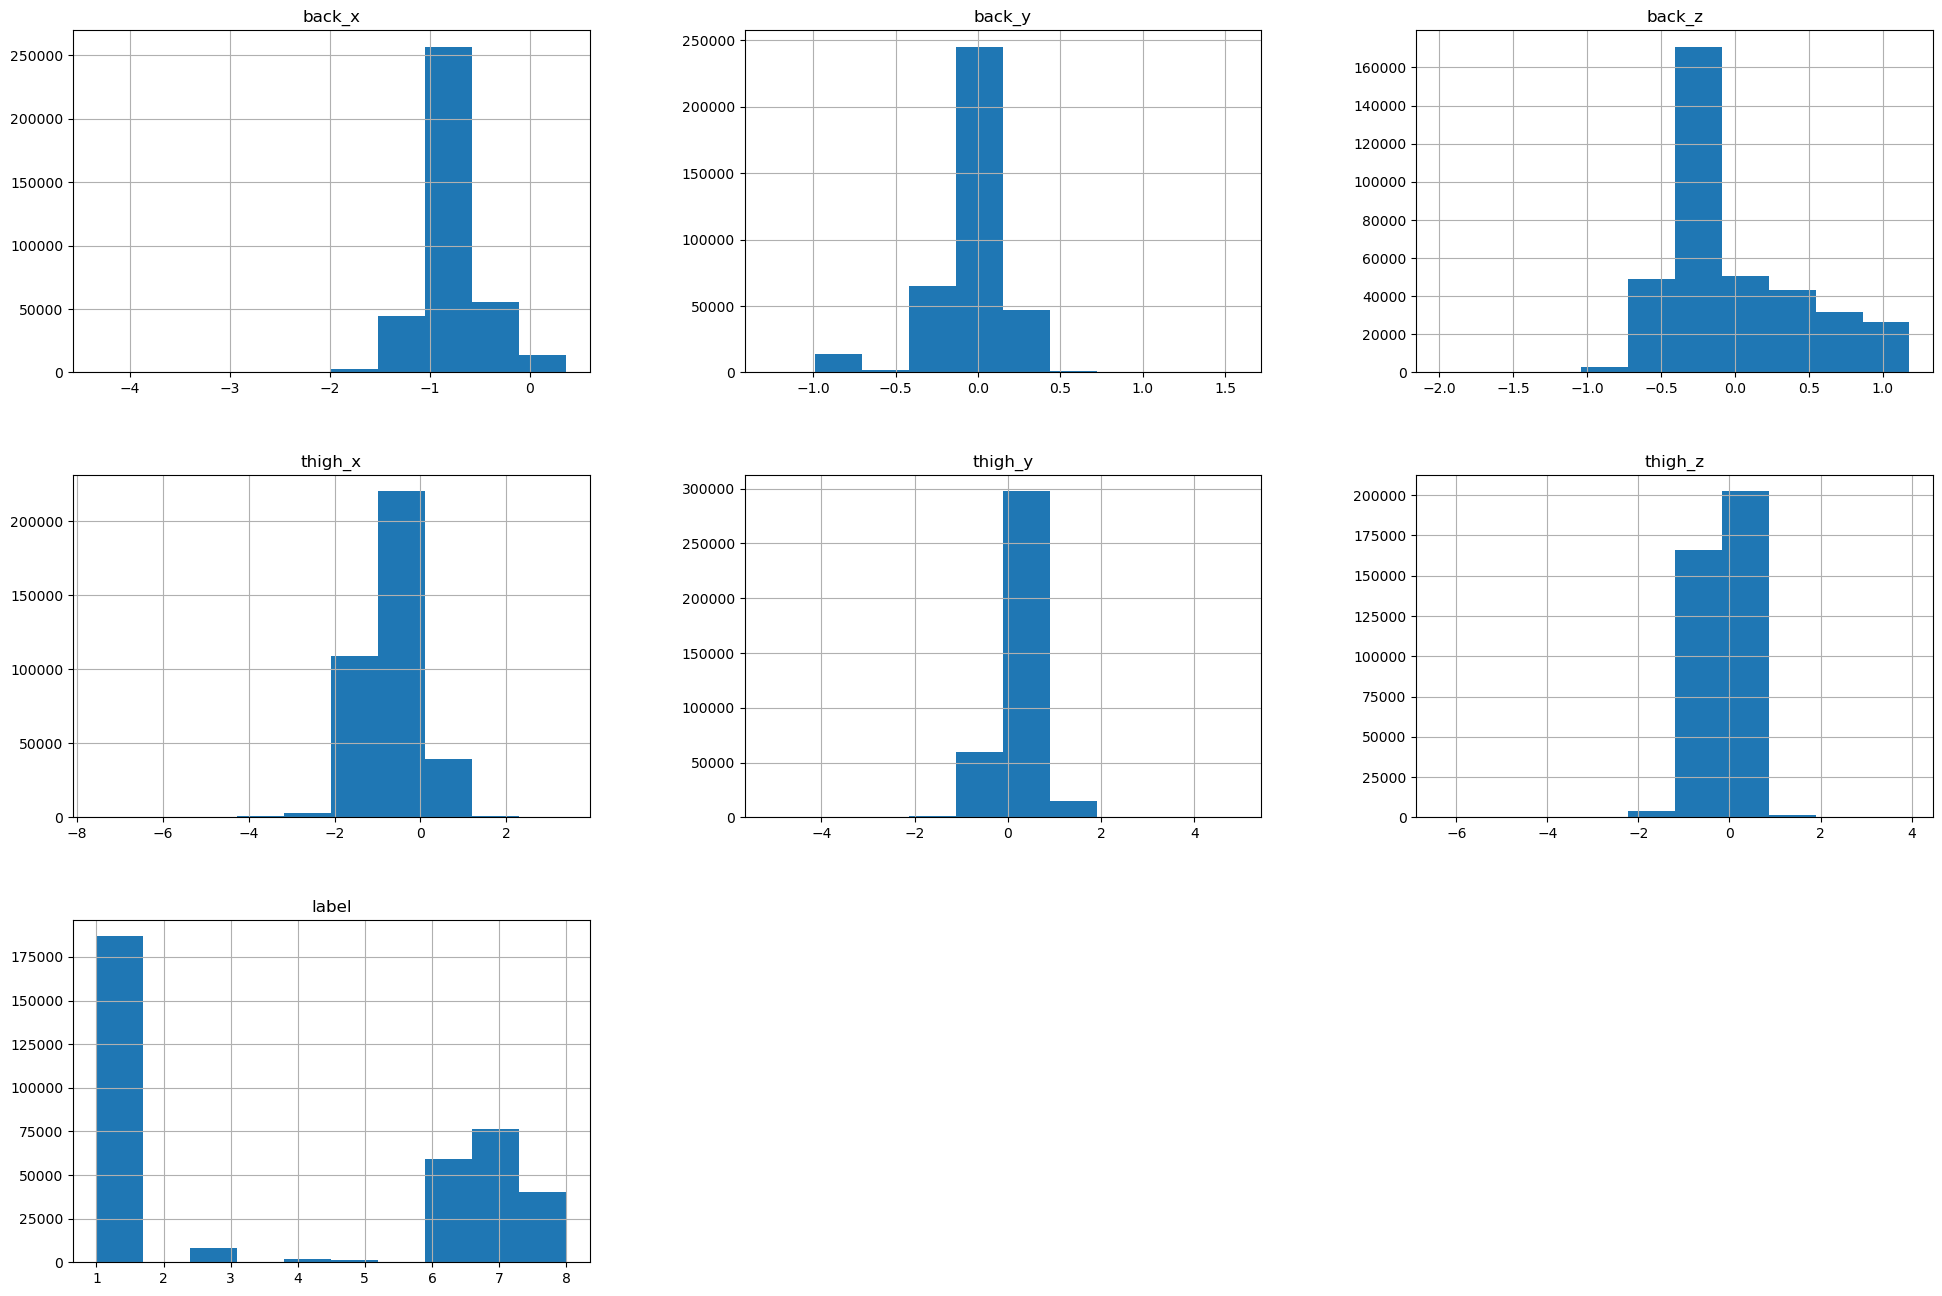

In [138]:
concat_data.hist(figsize=(24, 16))
plt.show()

c:\Users\Alienware\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


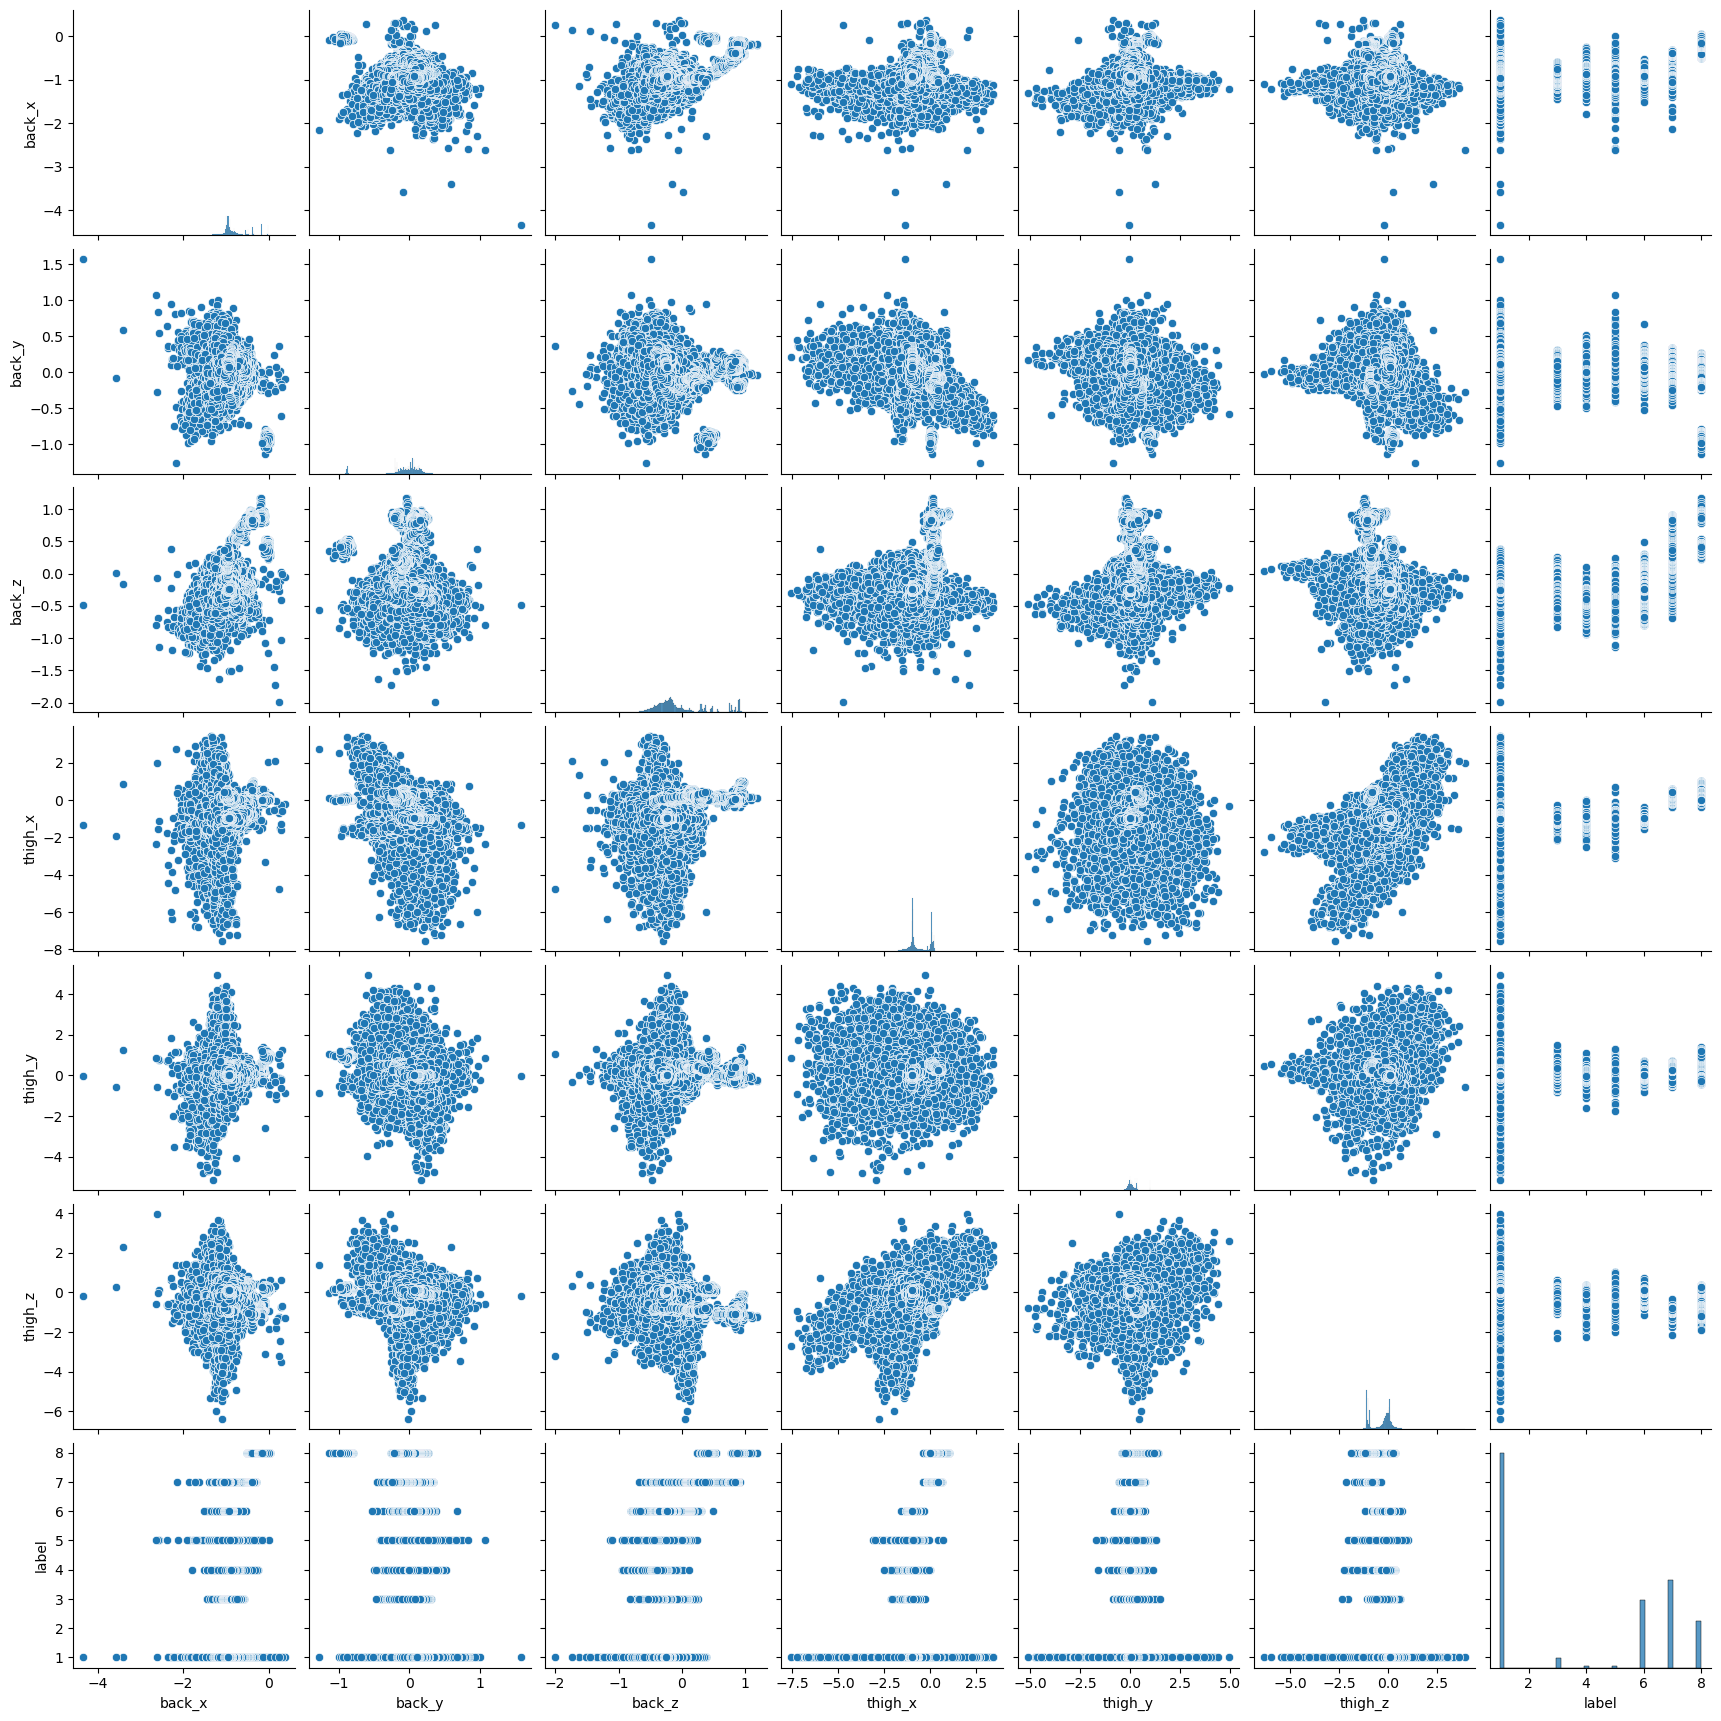

In [139]:
sns.pairplot(concat_data)
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(299454, 6) (299454, 1) (74864, 6) (74864, 1)


In [141]:
from imblearn.datasets import make_imbalance
X_train, y_train = make_imbalance(X_train, y_train, sampling_strategy={1: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000},random_state=14)

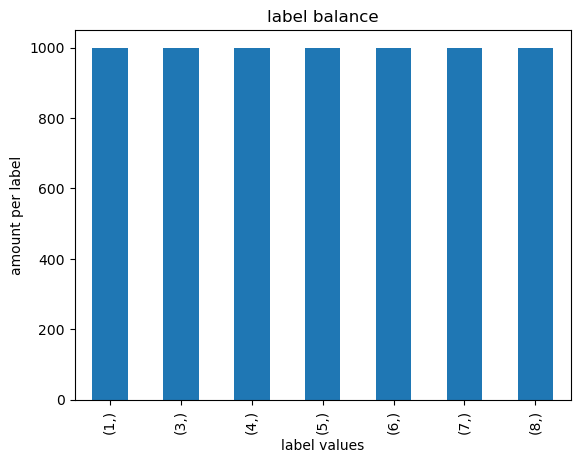

In [142]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [143]:
X_train

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
345551,-0.867432,0.026123,-0.208496,-0.416504,-0.015625,-0.096191
242018,-0.606201,-0.075195,-0.157471,-0.522705,0.146484,0.452393
320134,-1.278076,0.130859,-0.578369,-1.359131,0.046387,-0.429443
61206,-1.222656,0.072754,-0.657959,-0.351807,0.000244,-0.874512
309693,-0.834229,0.207275,-0.248779,-0.929443,0.069824,-0.118652
...,...,...,...,...,...,...
291686,-0.027832,-0.888916,0.463867,0.072510,0.984863,0.085449
298958,-0.031738,-0.886963,0.494873,0.072510,0.997559,0.068604
24303,-0.399170,0.126465,0.903320,0.062500,0.031250,-1.078125
167333,-0.171875,-0.203125,0.890625,0.187500,0.217285,-1.031250


In [144]:
from sklearn.svm import SVC
model_svc = SVC(kernel='poly', C=0.1, gamma=1)
model_svc.fit(X_train, y_train)

c:\Users\Alienware\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=1, kernel='poly')

In [145]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
#testing the model on X_test
y_predict=model_svc.predict(X_test)
print(f'classification_report for C = 0.1')
#classification report on y_test and y_predict
print (classification_report(y_test, y_predict))

classification_report for C = 0.1
              precision    recall  f1-score   support

           1       0.99      0.31      0.47     37201
           3       0.05      0.35      0.09      1751
           4       0.03      0.70      0.05       335
           5       0.02      0.48      0.04       306
           6       0.65      0.74      0.69     11826
           7       1.00      1.00      1.00     15331
           8       0.99      1.00      1.00      8114

    accuracy                           0.60     74864
   macro avg       0.53      0.65      0.48     74864
weighted avg       0.91      0.60      0.66     74864

